# Know the data

In [121]:
#Import libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [122]:
df = pd.read_csv("Unemployment in India.csv")

In [123]:
df.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [124]:
#No of rows
df.shape[0]

768

In [125]:
#no of columns
df.shape[1]

7

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [127]:
#missing values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [128]:
#duplicate values
df.duplicated().sum()

27

<Axes: >

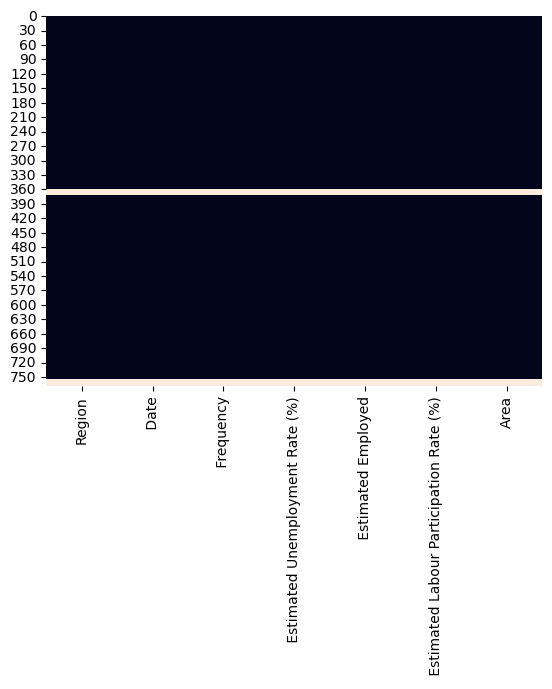

In [129]:
# Visualizing the missing values
# Checking Null Value by Plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

# Understanding the variable

In [130]:
df.describe(include = 'all').round(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.00,740.00,740.00,740
unique,28,14,2,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,381,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.79,7204460.03,42.63,NaN
std,NaN,NaN,NaN,10.72,8087988.43,8.11,NaN
min,NaN,NaN,NaN,0.00,49420.00,13.33,NaN
25%,NaN,NaN,NaN,4.66,1190404.50,38.06,NaN
50%,NaN,NaN,NaN,8.35,4744178.50,41.16,NaN
75%,NaN,NaN,NaN,15.89,11275489.50,45.50,NaN


In [131]:
#check unique values for each variable
for i in df.columns.tolist():
    print("unique value in ",i,"is",df[i].nunique())

unique value in  Region is 28
unique value in   Date is 14
unique value in   Frequency is 2
unique value in   Estimated Unemployment Rate (%) is 624
unique value in   Estimated Employed is 740
unique value in   Estimated Labour Participation Rate (%) is 626
unique value in  Area is 2


# Data Wrangling


In [135]:
# Rename the columns of the DataFrame
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']

In [136]:
#convert frequency to categorical data type
df['Frequency']=df['Frequency'].astype('category')

In [137]:
#convert region column to categorical data type
df['Region']=df['Region'].astype('category')

In [138]:
import datetime as dt

In [139]:
# Convert the 'Date' column to datetime format, specifying 'dayfirst' to handle date formats with day first
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [140]:
# Extract the month from the 'Date' column and create a new 'Month' column
df['Month']=df['Date'].dt.month

In [141]:
df['Month']

0      5.0
1      6.0
2      7.0
3      8.0
4      9.0
      ... 
763    NaN
764    NaN
765    NaN
766    NaN
767    NaN
Name: Month, Length: 768, dtype: float64

In [142]:
# Create a new 'Month_int' column by converting the 'Month' column to integers, handling missing values
df['Month_int'] = df['Month'].apply(lambda x: int(x) if pd.notna(x) else x)

In [143]:
# Drop the 'Month' column from the DataFrame
df.drop(columns='Month',inplace = True)

In [144]:
df['Month'].head(5)

KeyError: 'Month'

In [145]:
# Lets create a copy of the dataset for the data of during lockdown period
df_cp = df.copy()

In [146]:
df_cp.head(5)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5.0
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6.0
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7.0
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8.0
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9.0


In [147]:
# Drop all the missing values from 'df' dataset
df = df.dropna()

In [148]:
df.duplicated().sum()

0

In [149]:
# Define a date range mask to filter rows where 'Date' falls within the range of before lockdown period
mask = (df['Date']>='2019-05-3')& (df['Date']<='2020-03-31')

In [150]:
mask.head(20)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12    False
13    False
14     True
15     True
16     True
17     True
18     True
19     True
Name: Date, dtype: bool

In [151]:
# Use the mask to select and keep only the rows that meet the date range criteria
df = df.loc[mask]

In [152]:
df.describe()

,Date,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Month_int
count,588,588.000000,5.880000e+02,588.000000,588.000000
mean,2019-10-29 21:50:12.244897792,9.614864,7.470499e+06,43.815187,6.751701
min,2019-05-31 00:00:00,0.000000,8.618600e+04,26.330000,1.000000
25%,2019-07-31 00:00:00,4.332500,1.190404e+06,39.047500,3.000000
50%,2019-10-31 00:00:00,7.225000,5.064048e+06,42.330000,7.000000
75%,2020-01-31 00:00:00,13.300000,1.164705e+07,45.897500,10.000000
max,2020-03-31 00:00:00,34.690000,4.577751e+07,72.570000,12.000000
std,NaN,7.372715,8.276125e+06,7.679054,3.516752


In [153]:
# Define a date range mask to filter rows where 'Date' falls within the range of during lockdown period
mask=(df_cp['Date']>='2020-04-30')

In [154]:
mask

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Date, Length: 768, dtype: bool

In [155]:
df_cp.head(10)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5.0
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6.0
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7.0
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8.0
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9.0
5,Andhra Pradesh,2019-10-31,Monthly,3.52,12017412.0,43.01,Rural,10.0
6,Andhra Pradesh,2019-11-30,Monthly,4.12,11397681.0,41.00,Rural,11.0
7,Andhra Pradesh,2019-12-31,Monthly,4.38,12528395.0,45.14,Rural,12.0
8,Andhra Pradesh,2020-01-31,Monthly,4.84,12016676.0,43.46,Rural,1.0
9,Andhra Pradesh,2020-02-29,Monthly,5.91,11723617.0,42.83,Rural,2.0


In [156]:
# Use the mask to select and keep only the rows that meet the date range criteria
df_cp = df_cp.loc[mask]

In [157]:
df_cp.head(20)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Month_int
11,Andhra Pradesh,2020-04-30,Monthly,16.29,8792827.0,36.03,Rural,4.0
12,Andhra Pradesh,2020-05-31,Monthly,14.46,9526902.0,38.16,Rural,5.0
13,Andhra Pradesh,2020-06-30,Monthly,0.85,15572975.0,53.76,Rural,6.0
24,Assam,2020-05-31,Monthly,9.38,9926176.0,50.00,Rural,5.0
25,Assam,2020-06-30,Monthly,0.00,7544937.0,34.38,Rural,6.0
37,Bihar,2020-04-30,Monthly,45.09,14645275.0,38.63,Rural,4.0
38,Bihar,2020-05-31,Monthly,47.26,14050319.0,38.50,Rural,5.0
39,Bihar,2020-06-30,Monthly,20.49,20622566.0,37.40,Rural,6.0
51,Chhattisgarh,2020-04-30,Monthly,0.00,6534321.0,39.43,Rural,4.0
52,Chhattisgarh,2020-05-31,Monthly,7.64,5454091.0,35.56,Rural,5.0


# Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

In [158]:
# Create a figure with two subplots side by side.
plt.figure(figsize = (14,5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

<Axes: >

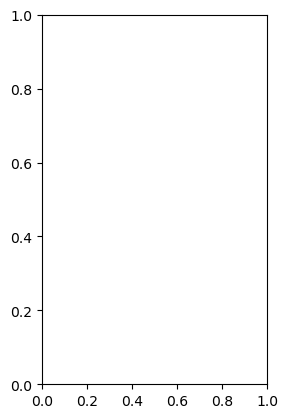

In [159]:
# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1,2,1)

C:\Users\Insha sadaf\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Region', ylabel='Estimated Unemployment Rate'>

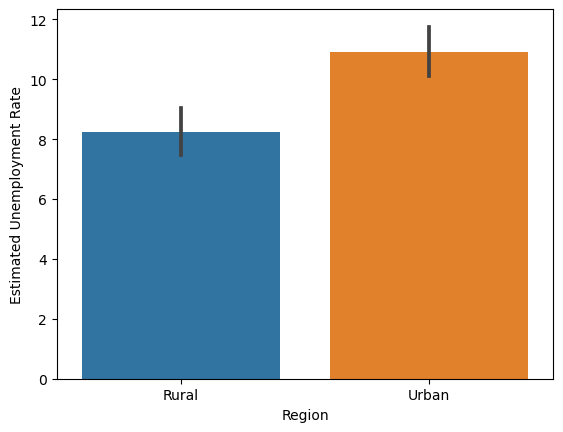

In [168]:
# Create a bar plot using Seaborn to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(x='Region', y='Estimated Unemployment Rate',data=df)

Text(0.5, 1.0, 'Estimated Unemployment Rate Before Lockdown')

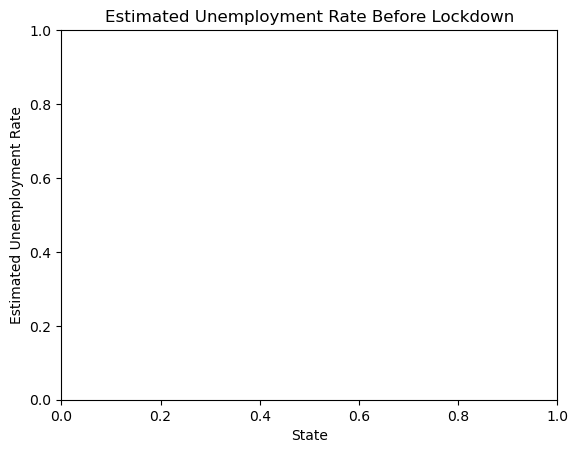

In [169]:
# Set labels and title for the first subplot.
plt.xlabel("State", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate Before Lockdown', fontsize=12)

<Axes: >

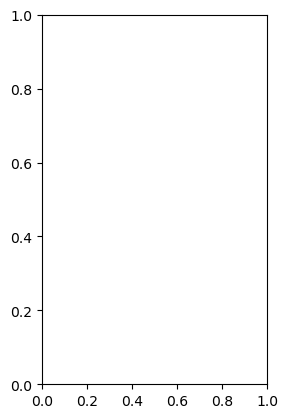

In [170]:
# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1,2,2)

C:\Users\Insha sadaf\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Region', ylabel='Estimated Unemployment Rate'>

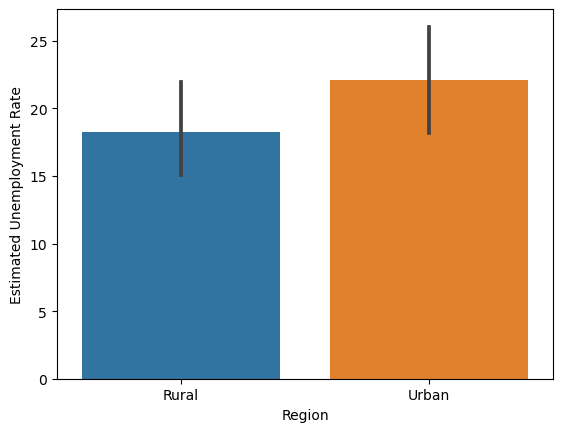

In [171]:
# Create a bar plot for the Estimated Unemployment Rate during lockdown.
sns.barplot(x ='Region',y='Estimated Unemployment Rate',data= df_cp)

Text(0.5, 1.0, 'Estimated Unemployment Rate During Lockdown')

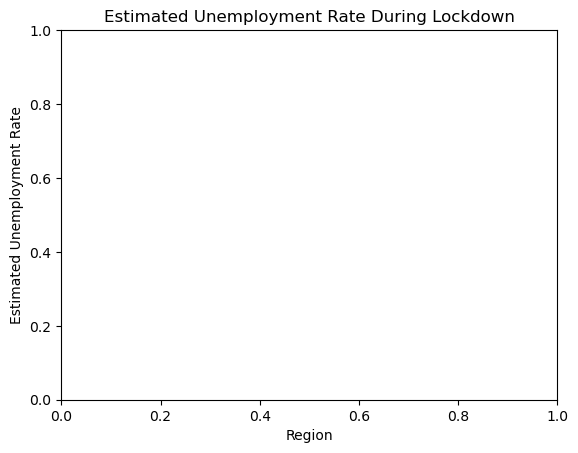

In [172]:
# Set labels and title for the second subplot.
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate During Lockdown', fontsize=12)



In [173]:
# Display the subplots side by side.
plt.show()

In [174]:
# Chart - 2 Swarm plot visualization code for State Wise Estimated Unemployment Rate before and during lockdown.

In [175]:
# Create a figure with two subplots side by side.
plt.figure(figsize =(25,8))


<Figure size 2500x800 with 0 Axes>

<Figure size 2500x800 with 0 Axes>

<Axes: >

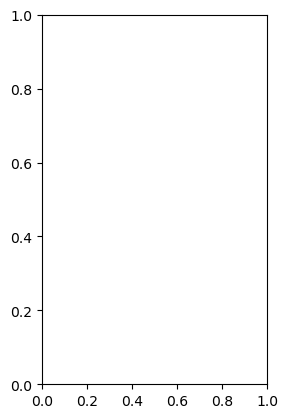

In [176]:
# Subplot 1: State Wise Estimated Unemployment Rate Before Lockdown
plt.subplot(1,2,1)

Text(0.5, 1.0, 'State Wise Estimated Unemployment Rate Before Lockdown')

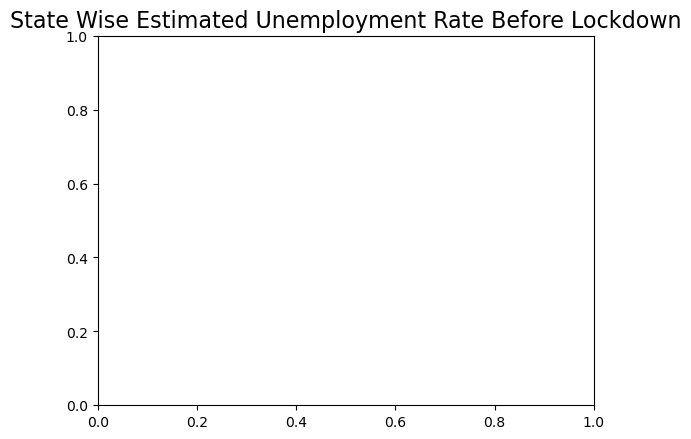

In [177]:
# Set the title for the first subplot.
plt.title("State Wise Estimated Unemployment Rate Before Lockdown", fontsize=16)

C:\Users\Insha sadaf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Insha sadaf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Insha sadaf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Insha sadaf\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 77.3% of the points cannot be placed; you may 

<Axes: xlabel='Estimated Unemployment Rate', ylabel='States'>

C:\Users\Insha sadaf\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Insha sadaf\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


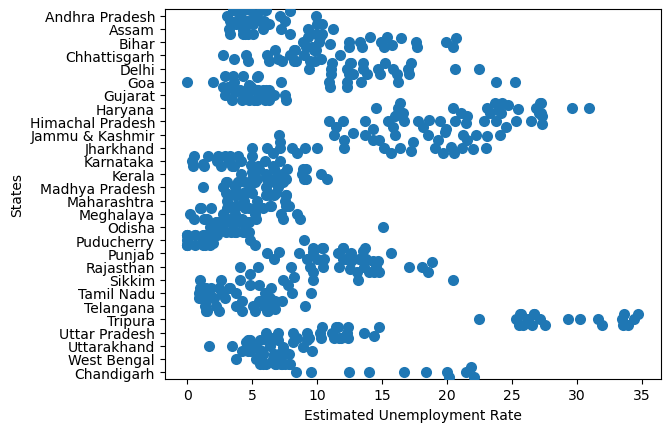

In [189]:
# Create a swarm plot to visualize the Estimated Unemployment Rate before lockdown.
sns.swarmplot(x='Estimated Unemployment Rate',y = "States",data = df,size=8)

Text(0, 0.5, 'States')

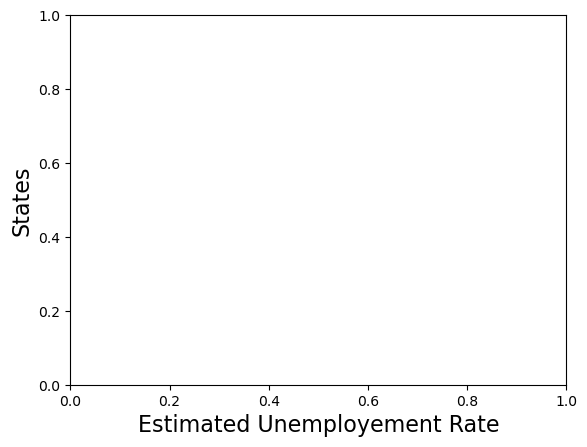

In [180]:
# Set labels for the first subplot.
plt.xlabel("Estimated Unemployement Rate", fontsize = 16)
plt.ylabel("States",fontsize = 16)

<Axes: >

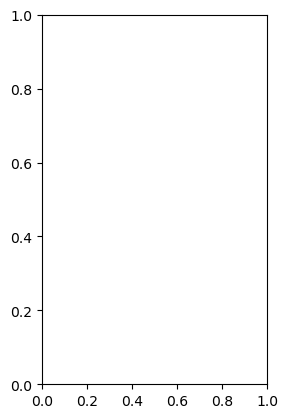

In [181]:
# Subplot 2: State Wise Estimated Unemployment Rate During Lockdown
plt.subplot(1,2,2)

Text(0.5, 1.0, 'State Wise Estimated Unemployment Rate During Lockdown')

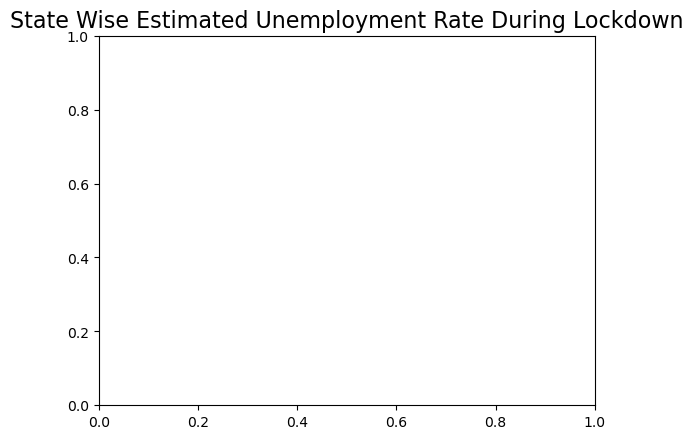

In [182]:
# Set the title for the second subplot.
plt.title("State Wise Estimated Unemployment Rate During Lockdown", fontsize=16)

Text(0, 0.5, 'States')

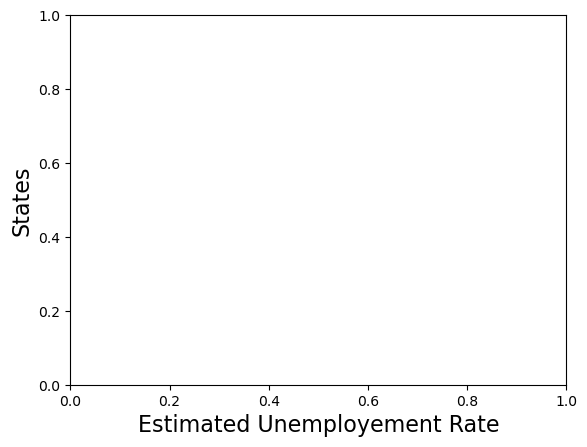

In [183]:
plt.xlabel("Estimated Unemployement Rate", fontsize = 16)
plt.ylabel("States", fontsize=16)

C:\Users\Insha sadaf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Insha sadaf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Insha sadaf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Insha sadaf\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may 

<Axes: xlabel='Estimated Unemployment Rate', ylabel='States'>

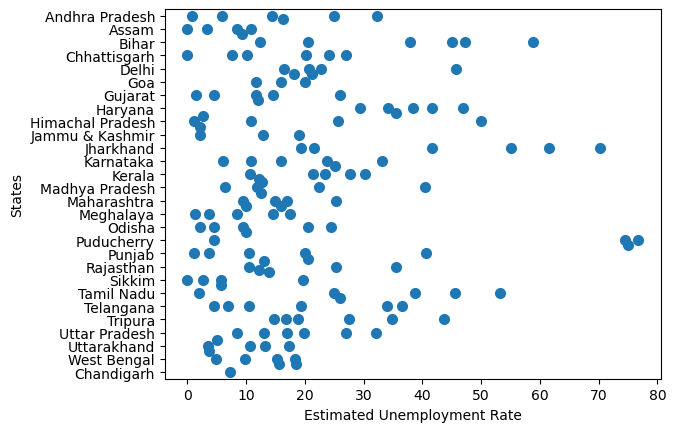

In [187]:

# Create a swarm plot to visualize the Estimated Unemployment Rate during lockdown.
sns.swarmplot(y = 'States',x='Estimated Unemployment Rate',data = df_cp,size =8)

In [190]:
# Display the subplots side by side.
plt.show()
     

In [191]:
## Chart - 3 Bar for visualization code for State wise Estimated Unemployment Rate before and during lockdown time.

(<Figure size 2500x800 with 1 Axes>, <Axes: >)

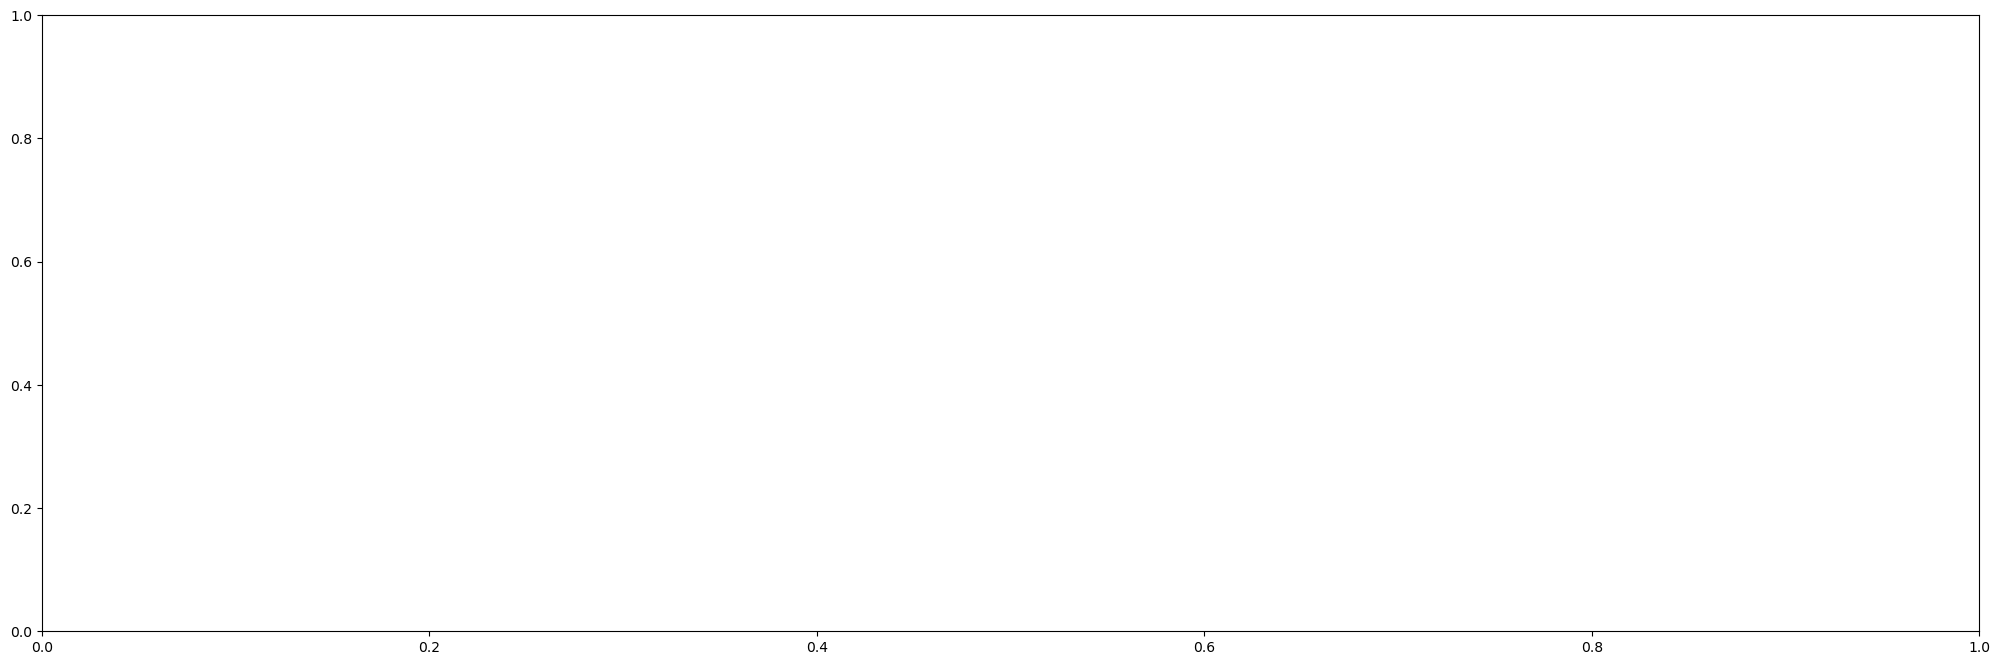

In [208]:

# Create a figure with two subplots side by side.
plt.subplots(figsize=(25, 8))

<Axes: >

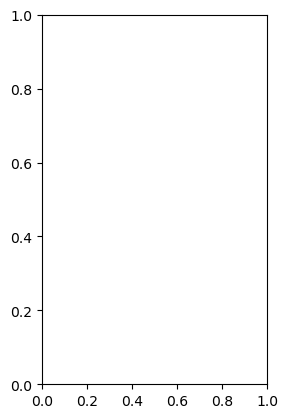

In [209]:
# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1,2,1)

Text(0.5, 1.0, 'Estimated Unemployment Rate Before Lockdown')

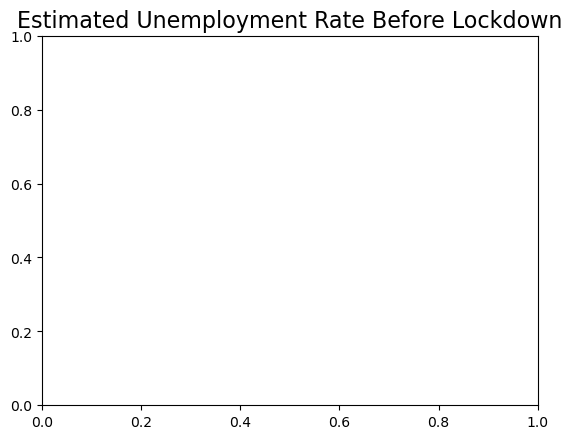

In [210]:
# Set the title for the first subplot.
plt.title("Estimated Unemployment Rate Before Lockdown", fontsize=16)

Text(0, 0.5, 'Estimated Unemployment Rate')

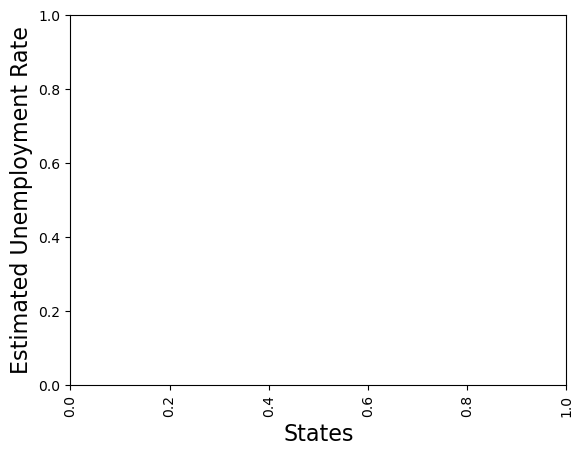

In [211]:
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

Text(0, 0.5, 'Estimated Unemployment Rate')

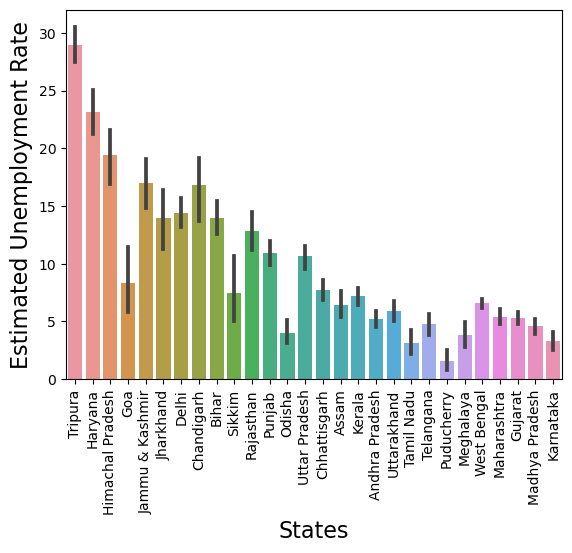

In [212]:

# Create a bar plot to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(data=df.sort_values(by='Estimated Unemployment Rate', ascending=False),x='States', y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

<Axes: >

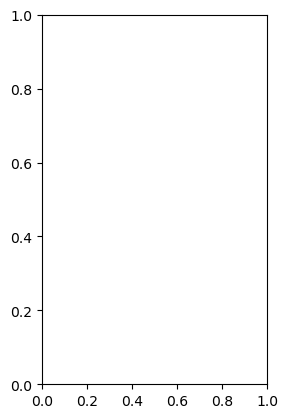

In [213]:
# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

Text(0.5, 1.0, 'Estimated Unemployment Rate During Lockdown')

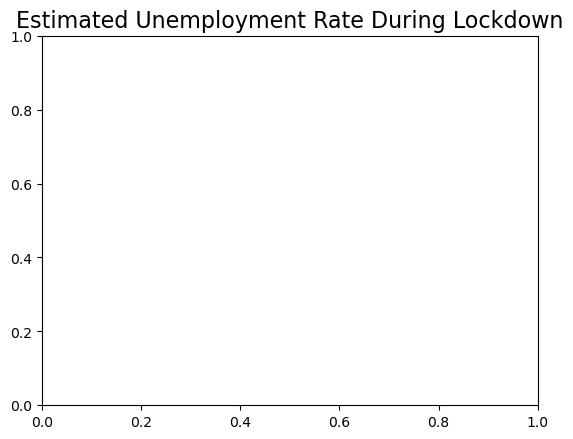

In [214]:
# Set the title for the second subplot.
plt.title("Estimated Unemployment Rate During Lockdown", fontsize=16)

Text(0, 0.5, 'Estimated Unemployment Rate')

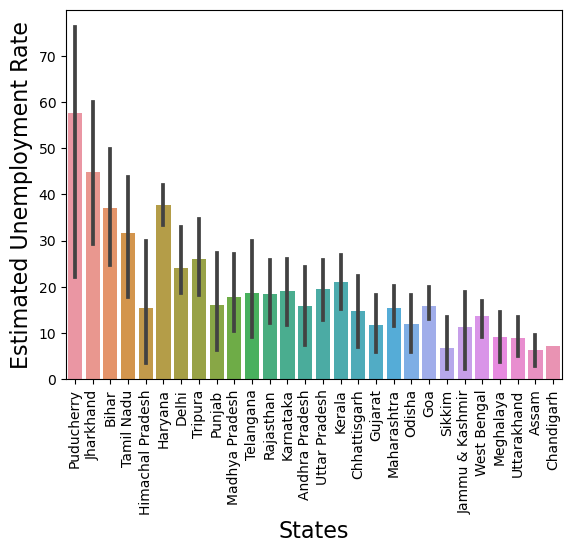

In [215]:
# Create a bar plot to visualize the Estimated Unemployment Rate during lockdown.
sns.barplot(data=df_cp.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)


In [216]:
# space between the plots
plt.tight_layout()


<Figure size 640x480 with 0 Axes>

In [217]:
# Display the subplots side by side.
plt.show()

In [218]:
# Chart - 4 Bar plot visualization code for state wise Estimated Employed Workforce


In [219]:
plt.figure(figsize=(25,8))

<Figure size 2500x800 with 0 Axes>

<Figure size 2500x800 with 0 Axes>

<Axes: >

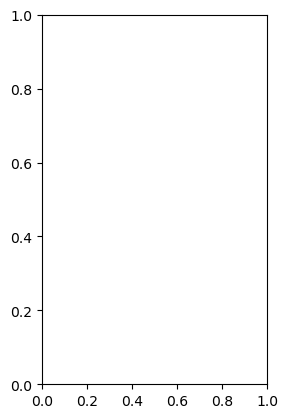

In [220]:
# Subplot 1: Estimated Employed Workforce Before Lockdown
plt.subplot(1,2,1)

Text(0.5, 1.0, 'Estimated Employed Workforce Before Lockdown')

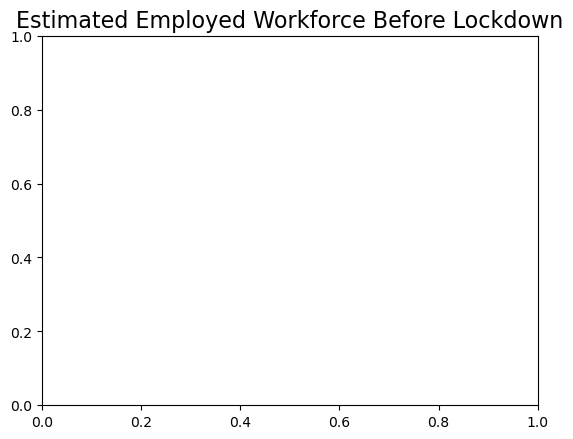

In [221]:
# Set the title for the first subplot.
plt.title("Estimated Employed Workforce Before Lockdown", fontsize=16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'West Bengal'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Tamil Nadu'),
  Text(6, 0, 'Rajasthan'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Karnataka'),
  Text(9, 0, 'Telangana'),
  Text(10, 0, 'Andhra Pradesh'),
  Text(11, 0, 'Odisha'),
  Text(12, 0, 'Assam'),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Chhattisgarh'),
  Text(15, 0, 'Punjab'),
  Text(16, 0, 'Delhi'),
  Text(17, 0, 'Kerala'),
  Text(18, 0, 'Haryana'),
  Text(19, 0, 'Jammu & Kashmir'),
  Text(20, 0, 'Uttarakhand'),
  Text(21, 0, 'Himachal Pradesh'),
  Text(22, 0, 'Meghalaya'),
  Text(23, 0, 'Tripura'),
  Text(24, 0, 'Chandigarh'),
  Text(25, 0, 'Puducherry'),
  Text(26, 0, 'Goa'),
  Text(27, 0, 'Sikkim')])

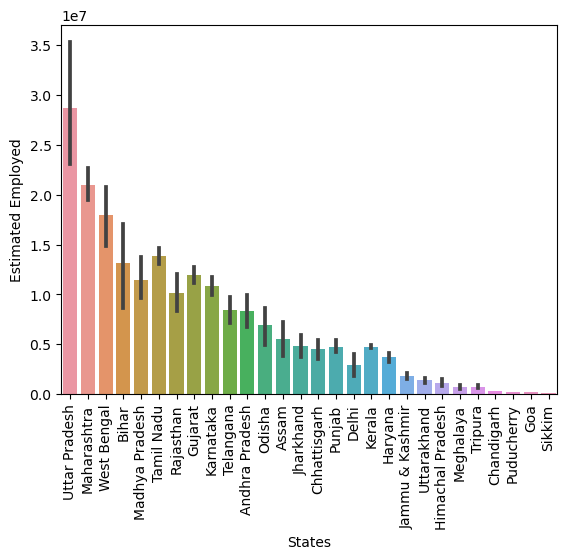

In [223]:
# Create a bar plot to visualize the Estimated Employed Workforce before lockdown.
sns.barplot(data = df.sort_values(by ='Estimated Employed',ascending = False),x = "States", y = 'Estimated Employed')
# Rotate x-axis labels for better readability.
plt.xticks(rotation = 90)

Text(0, 0.5, 'Estimated Employed')

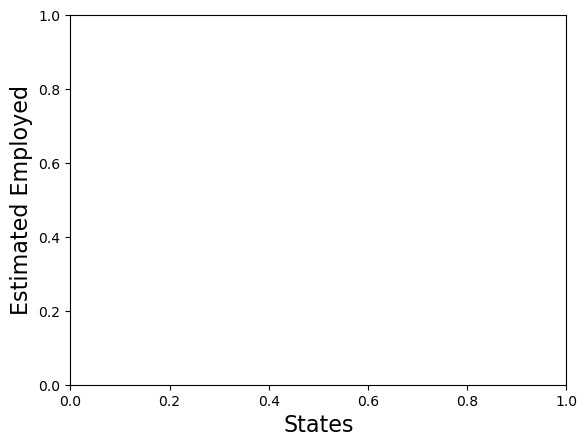

In [224]:
# Set labels for the first subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)

<Axes: >

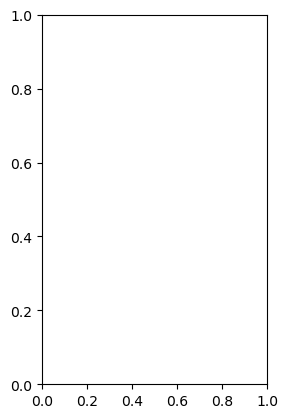

In [225]:
# Subplot 2: Estimated Employed Workforce During Lockdown
plt.subplot(1,2,2)

Text(0.5, 1.0, 'Estimated Employed Workforce During Lockdown')

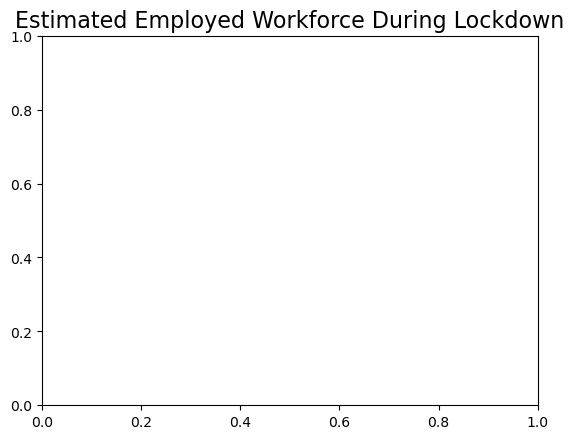

In [226]:
plt.title("Estimated Employed Workforce During Lockdown", fontsize=16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'West Bengal'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Rajasthan'),
  Text(6, 0, 'Andhra Pradesh'),
  Text(7, 0, 'Karnataka'),
  Text(8, 0, 'Gujarat'),
  Text(9, 0, 'Odisha'),
  Text(10, 0, 'Tamil Nadu'),
  Text(11, 0, 'Assam'),
  Text(12, 0, 'Telangana'),
  Text(13, 0, 'Chhattisgarh'),
  Text(14, 0, 'Jharkhand'),
  Text(15, 0, 'Punjab'),
  Text(16, 0, 'Kerala'),
  Text(17, 0, 'Haryana'),
  Text(18, 0, 'Delhi'),
  Text(19, 0, 'Jammu & Kashmir'),
  Text(20, 0, 'Himachal Pradesh'),
  Text(21, 0, 'Uttarakhand'),
  Text(22, 0, 'Meghalaya'),
  Text(23, 0, 'Tripura'),
  Text(24, 0, 'Goa'),
  Text(25, 0, 'Chandigarh'),
  Text(26, 0, 'Puducherry'),
  Text(27, 0, 'Sikkim')])

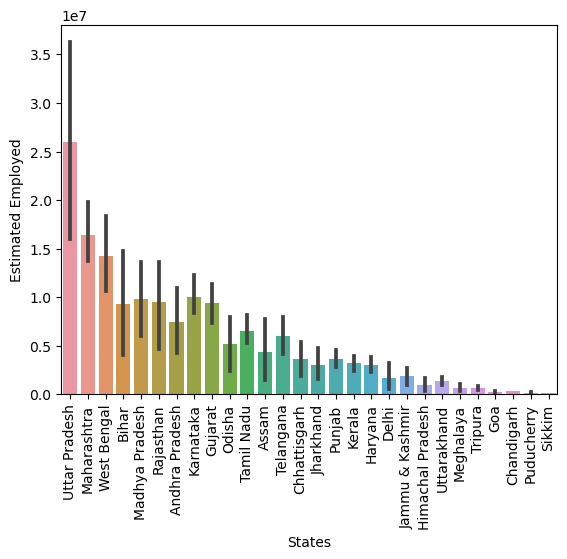

In [228]:

# Create a bar plot to visualize the Estimated Employed Workforce during lockdown
sns.barplot(data = df_cp.sort_values(by ='Estimated Employed', ascending=False),x="States",y = 'Estimated Employed')
plt.xticks(rotation=90)

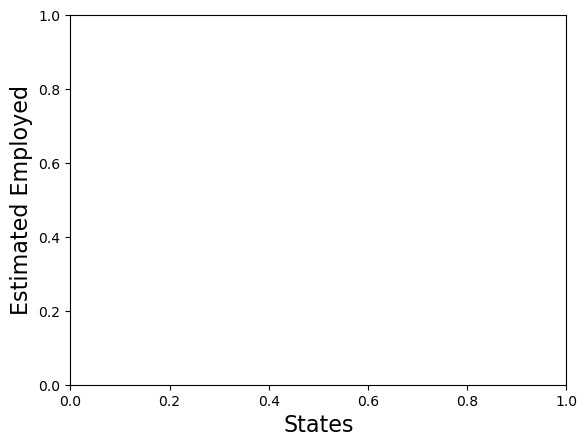

In [229]:
# Set labels for the second subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)

# Display the subplots side by side.
plt.show()

In [230]:
# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))


<Figure size 2500x800 with 0 Axes>

<Figure size 2500x800 with 0 Axes>

<Axes: >

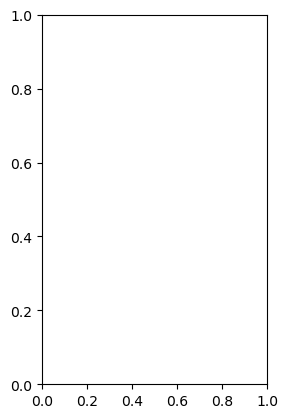

In [231]:
# Subplot 1: Estimated Labour Participation Rate Before Lockdown.
plt.subplot(1,2,1)


Text(0.5, 1.0, 'Estimated Labour Participation Rate Before Lockdown')

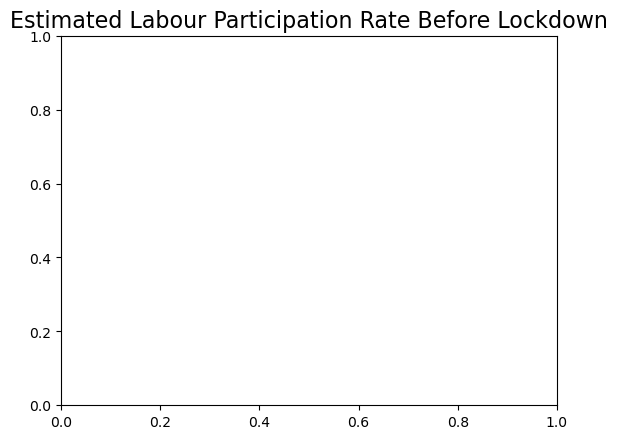

In [232]:
# Set the title for the first subplot.
plt.title("Estimated Labour Participation Rate Before Lockdown", fontsize=16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'Telangana'),
  Text(1, 0, 'Tripura'),
  Text(2, 0, 'Meghalaya'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Sikkim'),
  Text(5, 0, 'Gujarat'),
  Text(6, 0, 'Tamil Nadu'),
  Text(7, 0, 'Maharashtra'),
  Text(8, 0, 'Himachal Pradesh'),
  Text(9, 0, 'West Bengal'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Delhi'),
  Text(12, 0, 'Puducherry'),
  Text(13, 0, 'Jammu & Kashmir'),
  Text(14, 0, 'Chhattisgarh'),
  Text(15, 0, 'Punjab'),
  Text(16, 0, 'Karnataka'),
  Text(17, 0, 'Jharkhand'),
  Text(18, 0, 'Goa'),
  Text(19, 0, 'Andhra Pradesh'),
  Text(20, 0, 'Chandigarh'),
  Text(21, 0, 'Odisha'),
  Text(22, 0, 'Rajasthan'),
  Text(23, 0, 'Kerala'),
  Text(24, 0, 'Madhya Pradesh'),
  Text(25, 0, 'Uttar Pradesh'),
  Text(26, 0, 'Bihar'),
  Text(27, 0, 'Uttarakhand')])

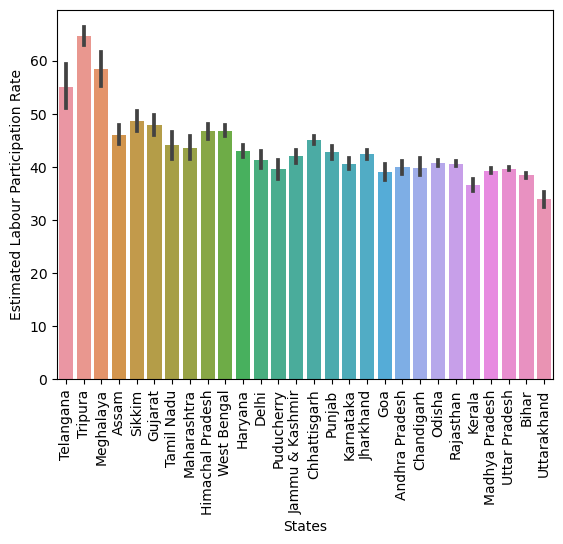

In [235]:
# Create a bar plot to visualize the Estimated Labour Participation Rate before lockdown.
sns.barplot(data=df.sort_values(by='Estimated Labour Participation Rate', ascending=False),x="States",y='Estimated Labour Participation Rate')
plt.xticks(rotation = 90)

Text(0, 0.5, 'Estimated Labour Participation Rate')

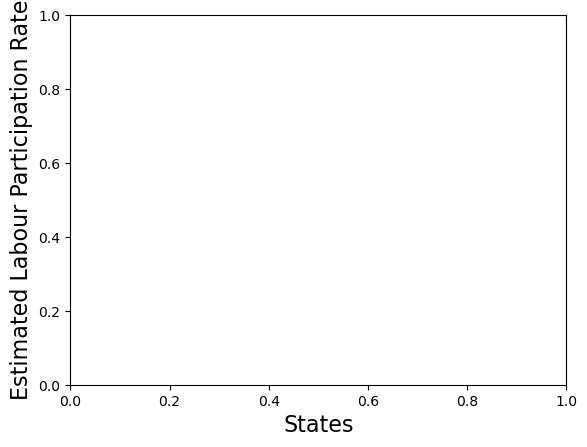

In [236]:
# Set labels for the first subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)

<Axes: >

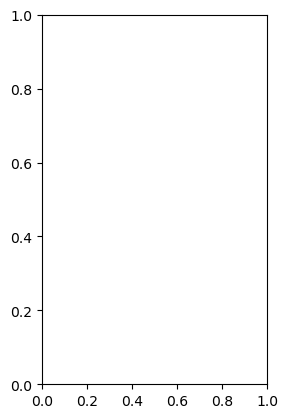

In [237]:
# Subplot 2: Estimated Labour Participation Rate During Lockdown.
plt.subplot(1, 2, 2)

Text(0.5, 1.0, 'Estimated Labour Participation Rate During Lockdown')

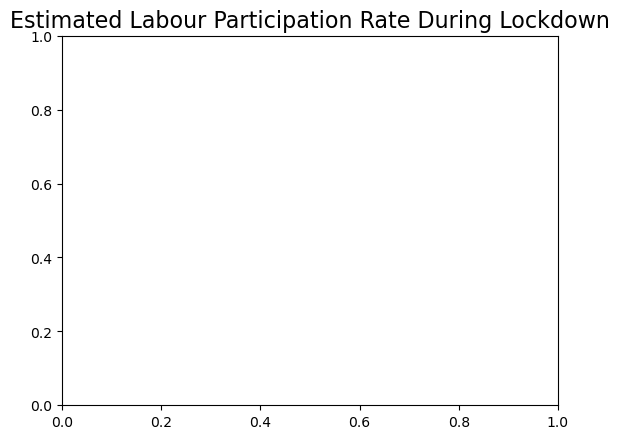

In [238]:
# Set the title for the second subplot.
plt.title("Estimated Labour Participation Rate During Lockdown", fontsize=16)

In [ ]:
# Create a bar plot to visualize the Estimated Labour Participation Rate during lockdown.
sns.barplot(data=df_cp.sort_values(by='Estimated Labour Participation Rate', ascending=False), x="States", y="Estimated Labour Participation Rate")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)


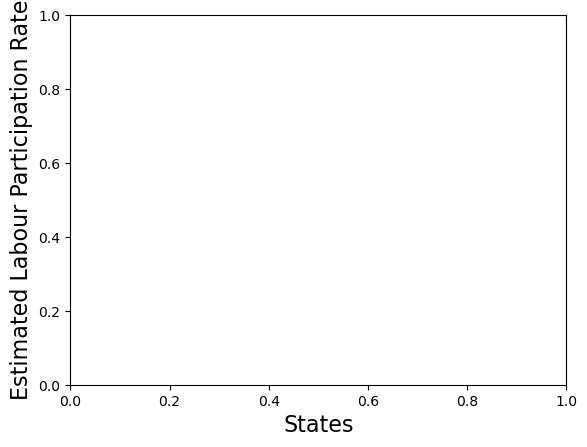

In [240]:
# Set labels for the second subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)

# Display the subplots side by side.
plt.show()

In [241]:
# Create new DataFrames
df1 = df[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]
df2 = df_cp[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]

In [242]:
# Chart - 6 Correlation heatmap visualization code
# Create a figure with two subplots side by side.
plt.figure(figsize=(25,8))

<Figure size 2500x800 with 0 Axes>

<Figure size 2500x800 with 0 Axes>

<Axes: >

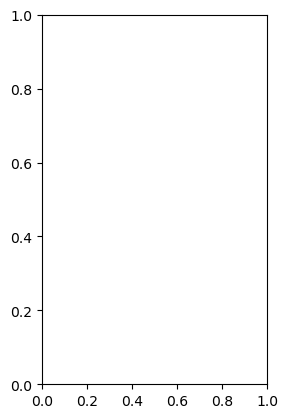

In [243]:
# Subplot 1: Correlations of Variables Before Lockdown.
plt.subplot(1,2,1)

Text(0.5, 1.0, 'Correlations of Variables Before Lockdown')

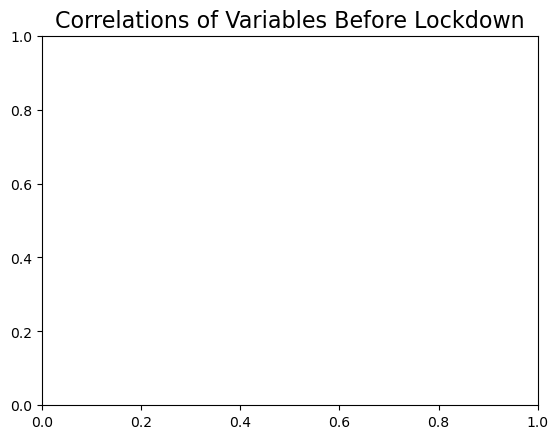

In [244]:
# Set the title for the first subplot.
plt.title("Correlations of Variables Before Lockdown", fontsize=16)

<Axes: >

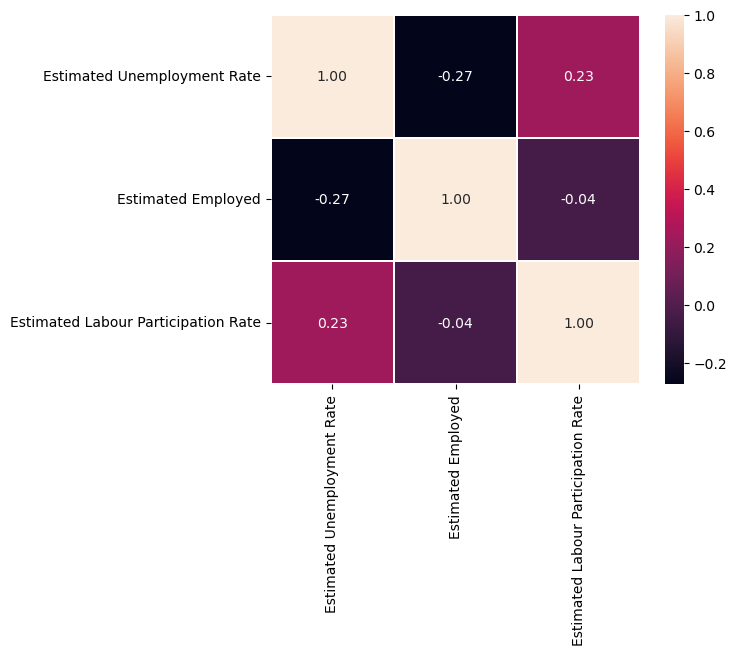

In [245]:
# Create a heatmap to visualize the correlations between variables in df1
sns.heatmap(df1.corr(),annot = True,linewidths = 0.1,fmt='.2f',square = True)

<Axes: >

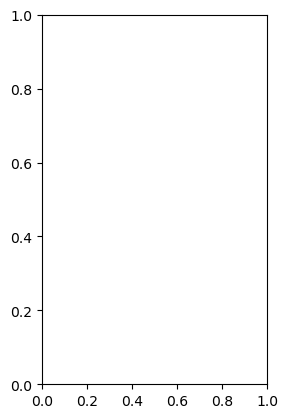

In [246]:
# Subplot 2: Correlations of Variables During Lockdown.
plt.subplot(1,2,2)

Text(0.5, 1.0, 'Correlations of Variables During Lockdown')

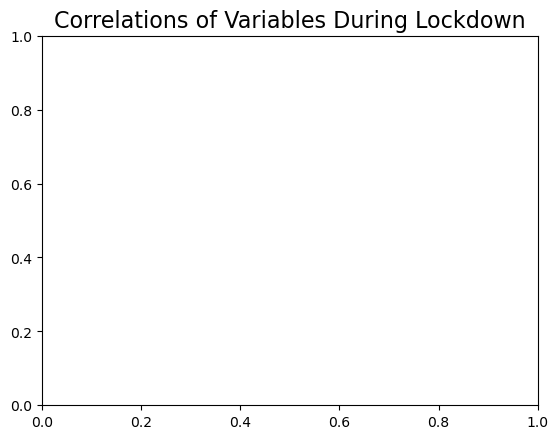

In [247]:
# Set the title for the second subplot.
plt.title("Correlations of Variables During Lockdown", fontsize=16)

<Axes: >

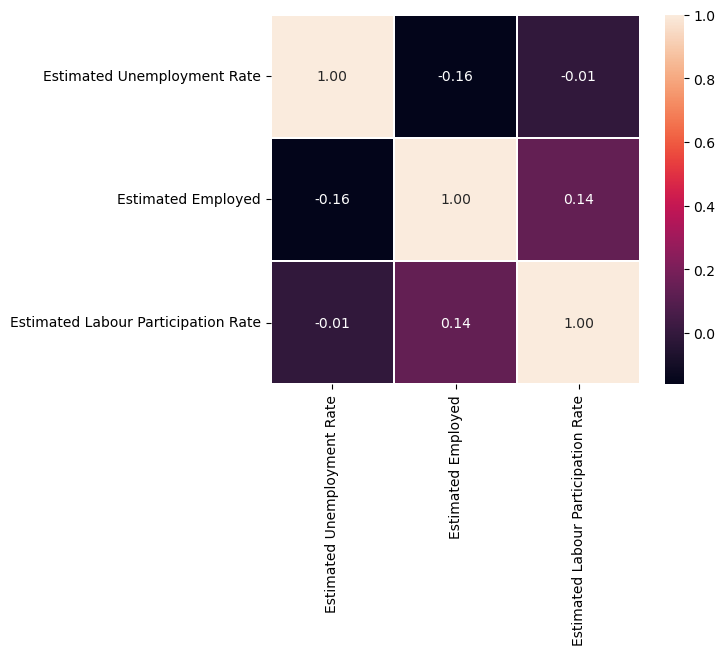

In [248]:
# Create a heatmap to visualize the correlations between variables in df2
sns.heatmap(df2.corr(),annot = True ,linewidths = 0.1,fmt='.2f',square =  True)

In [249]:
# Display the subplots side by side.
plt.show()

# Conclusion